In [15]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

%matplotlib inline

random.seed(1016)

In [4]:
imdf = pd.read_csv('./imdf_full.csv', index_col=0)
imdf.head()

,Actors,Awards,Box Office ($),Country,Director,Genre,Language,MPAA Rating,Metacritic Score,Movie Title,...,Ziad Doueiri,Zoe Lister-Jones.1,Zoe R. Cassavetes,Zoltan Deme,Zoltan Spirandelli,Zoya Akhtar,Álex de la Iglesia,Élie Chouraqui,Émile Gaudreault,Éric Rohmer
0,"['Rosanna Arquette', 'Madonna', 'Aidan Quinn',...",Nominated for 1 Golden Globe. Another 1 win & ...,27400000,USA,Susan Seidelman,"['Comedy', 'Drama']",English,PG-13,71.0,Desperately Seeking Susan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['Jackie Chan', 'Danny Aiello', 'Sandy Alexand...",NaN,829000,"Hong Kong, USA",James Glickenhaus,"['Action', 'Crime', 'Thriller']","English, Cantonese",R,NaN,The Protector,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['Simon Srebnik', 'Michael Podchlebnik', 'Motk...",14 wins.,15642,"France, UK",Claude Lanzmann,"['Documentary', 'History', 'War']","German, Hebrew, Polish, Yiddish, French",NOT RATED,99.0,Shoah,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Kevin Kline', 'Scott Glenn', 'Kevin Costner'...",Nominated for 2 Oscars. Another 1 win & 2 nomi...,33200000,USA,Lawrence Kasdan,"['Action', 'Crime', 'Drama']",English,PG-13,64.0,Silverado,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Jeff Bridges', 'Rosanna Arquette', 'Alexandr...",1 nomination.,1305114,USA,Hal Ashby,"['Action', 'Crime', 'Drama']","English, Spanish",R,NaN,8 Million Ways to Die,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I'll be dropping all non-numeric columns for modeling. As well as observations with NaN values.

In [5]:
imdf = imdf.drop(['Actors','Metacritic Score','Rotten Tomatoes Score','imdb Score','imdb ID', 'Release Date', 'Awards', 'Director', 'Genre', 'Movie Title', 'Plot', 'Country', 'Language', 'MPAA Rating', 'Production Studio', 'Year of Release', 'Writer'], axis=1)

In [7]:
imdf.dropna(inplace=True)

Next up is dropping actors and directors that don't have a large portfolio to reduce the number of features.

In [6]:
how_are_you_here = [col for col in imdf if imdf[col].sum() == 0]
one_act = [col for col in imdf if imdf[col].sum() == 1]
two_acts = [col for col in imdf if imdf[col].sum()==2]
three_times_no_charm = [col for col in imdf if imdf[col].sum()==3]
four_no_more = [col for col in imdf if imdf[col].sum()==4]

In [8]:
imdf = imdf.drop(how_are_you_here, axis=1)
imdf = imdf.drop(one_act, axis = 1)
imdf = imdf.drop(two_acts, axis = 1)
imdf = imdf.drop(three_times_no_charm, axis=1)
imdf = imdf.drop(four_no_more, axis=1)

Let's see what we're dealing with now that we've sifted out smaller portfolios as features in our data frame.

In [9]:
imdf.shape

(6261, 1146)

Let's set our target variable and independent variables.

In [10]:
y = imdf['Box Office ($)']
X = imdf.drop('Box Office ($)', axis = 1)

Train/Test split. Good practice for any predictive model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

-1.2257232250208512e+17

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


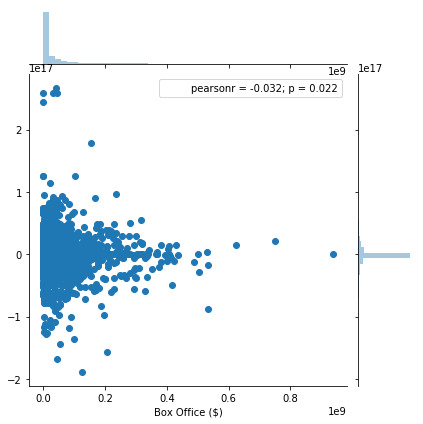

In [16]:
ypred = lr.predict(X_test)
sns.jointplot(y_test, ypred)

In [14]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.2649743089596941

Okay, not the most exciting numbers, this is something we can definitely fine tune in the future. </br>
Let's try predicting the box office returns on an entirely new, made-up horror movie starring Emma Stone and directed by Christopher Nolan.

In [20]:
columns = imdf.columns
new_df = pd.DataFrame(np.zeros(shape=(1,1146)), columns=columns)
new_df

,Box Office ($),Runtime,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Todd Phillips,Todd Solondz,Tony Scott,Tyler Perry.1,Werner Herzog.1,Wes Anderson.1,Will Gluck,Woody Allen.1,Yimou Zhang,Zack Snyder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
new_df['Emma Stone'] = 1.0
new_df['Horror'] = 1.0
new_df['Christopher Nolan'] = 1.0

In [25]:
rf.predict(new_df.drop('Box Office ($)', axis = 1))/1000000

array([125.8246217])

This suggests that the movie would rake in nearly $126M at the box office.